In [39]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [20]:
#Load data into a dataframe
df = pd.read_csv('heart.csv')

In [3]:
# Discribe the data in dataframe  
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# View first few records from top of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#check for missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

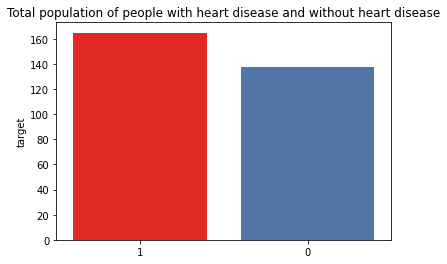

In [15]:
#to define the color palette of the bar
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

#Visualize dataframe by comparing total poulation with heart disease = 1 and No heart disease = 0
sns.barplot(x=['1', '0'], y=df['target'].value_counts(), palette=sns.color_palette(colors));
plt.title('Total population of people with heart disease and without heart disease');
plt.show()


In [22]:
#visualizing dataframe by Men Vs. Women heart disease  
fig = px.histogram(df,x='sex',color='target', barmode='group',
                   title='Heart Disease by Sex',
                   color_discrete_sequence=px.colors.qualitative.Safe)
fig.show()

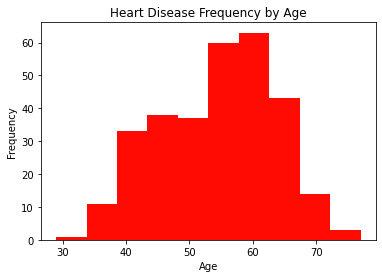

In [34]:
#visualize heart disease by age
plt.title("Heart Disease Frequency by Age")
plt.xlabel("Age")
plt.ylabel("Frquency")
df.age.plot.hist();

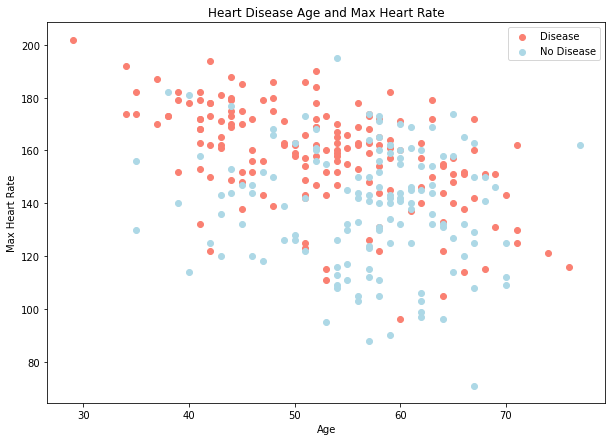

In [33]:
# define size of the figure
plt.figure(figsize=(10, 7))

#Visualize age with variable thalach which is maximum heart rate achieved at that age for population with heart disease
plt.scatter(df.age[df.target == 1], df.thalach[df.target ==1],
           c = "salmon")

#Visualize age with variable thalach which is maximum heart rate achieved at that age for population with No heart disease
plt.scatter(df.age[df.target == 0], df.thalach[df.target==0],
           c = "lightblue")

#shoe title and legend on the chart
plt.title("Heart Disease Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

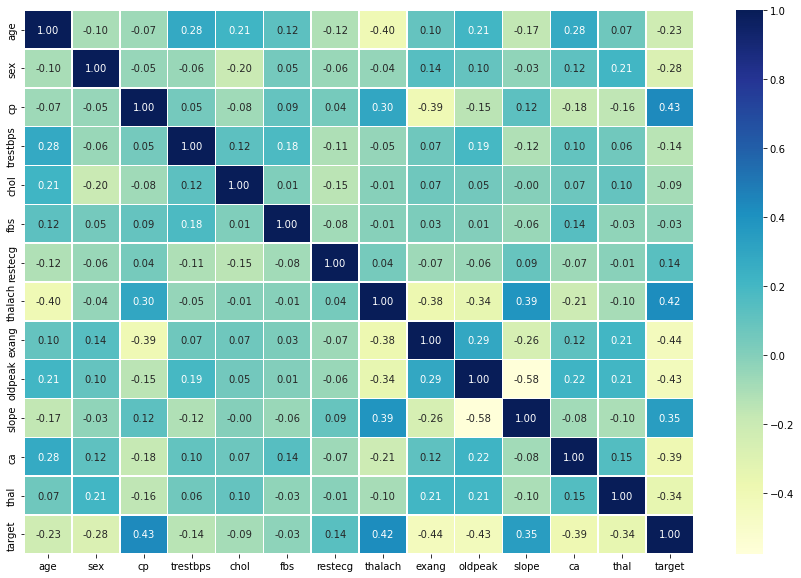

In [38]:
#visualization for corrolation cofficient by heatmap for features 
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (15, 10))

ax = sns.heatmap(corr_matrix, 
                annot=True,
                linewidths= 0.5,
                fmt="0.2f",
                cmap="YlGnBu");

### Logistic Regression

In [40]:
# Use all variables except 'target' as independent variables
data_model_X = df.drop("target", axis = 1)
data_model_X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [41]:
# Use 'target' as dependent variable
data_model_y = df.target

# Import package to split the data
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.25, random_state=8)

In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [44]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Accepted and Not-Accepted
print('\n')
print('No. of heart disease and no heart disease in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of heart disease and no heart disease in the validation set:')
print(y_val.value_counts())


No. of samples in training set:  227
No. of samples in validation set: 76


No. of heart disease and no heart disease in the training set:
1    118
0    109
Name: target, dtype: int64


No. of heart disease and no heart disease in the validation set:
1    47
0    29
Name: target, dtype: int64


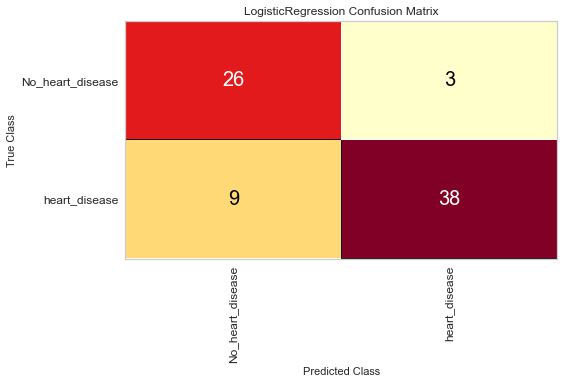

In [45]:
# Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model
log_model = LogisticRegression(solver='liblinear')

#The ConfusionMatrix visualizer taxes a model
classes = ['No_heart_disease','heart_disease']
cm = ConfusionMatrix(log_model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
   label.set_size(20)

cm.poof()

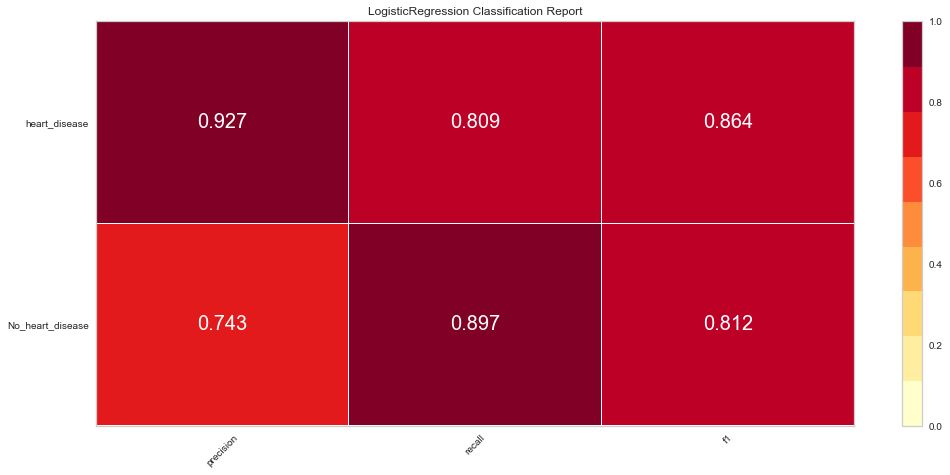

In [46]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(log_model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [47]:
# Create predictions
predictions = log_model.predict(X_val)

# Use score method to get accuracy of model
score = log_model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.8421052631578947


### Random Forest

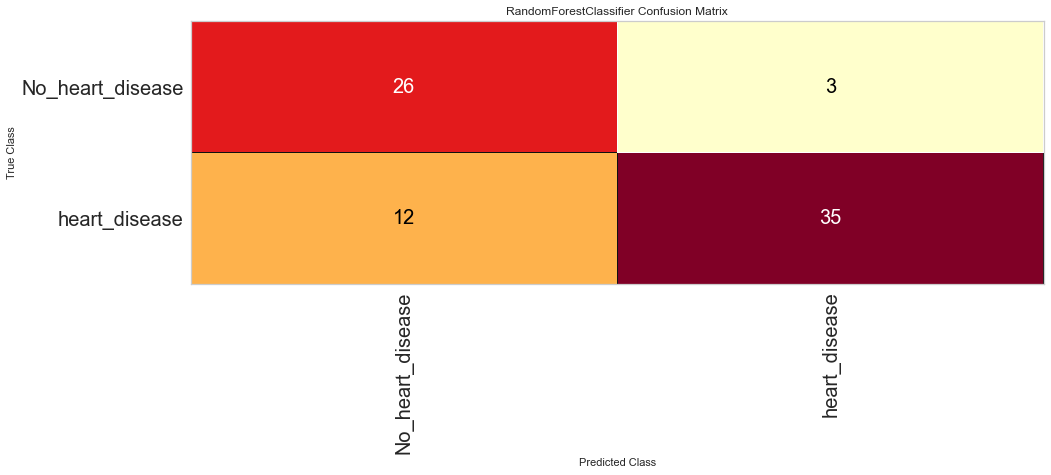

In [48]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classification model
rf_model = RandomForestClassifier()

#The ConfusionMatrix visualizer taxes a model
classes = ['No_heart_disease','heart_disease']
cm = ConfusionMatrix(rf_model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
   label.set_size(20)

cm.poof()

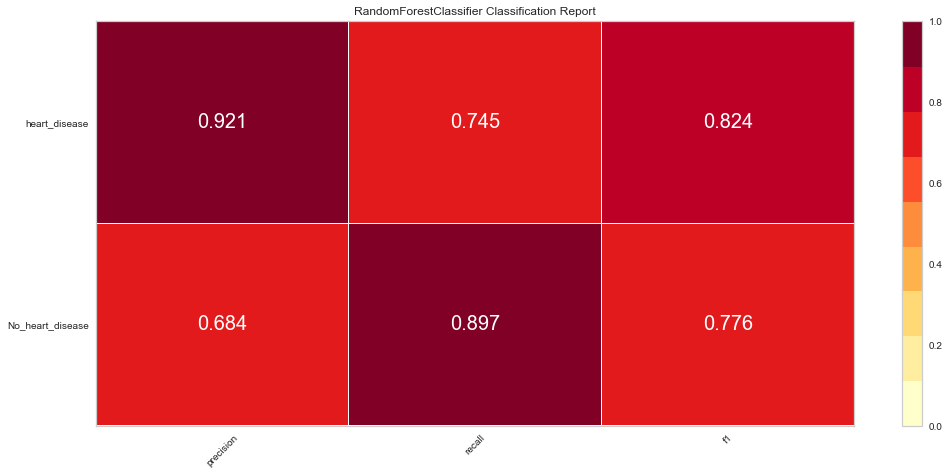

In [49]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(rf_model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [50]:
# Create prediction
y_pred = rf_model.predict(X_val)

# Use score method to get accuracy of model
score = rf_model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.8026315789473685


### Decision Tree

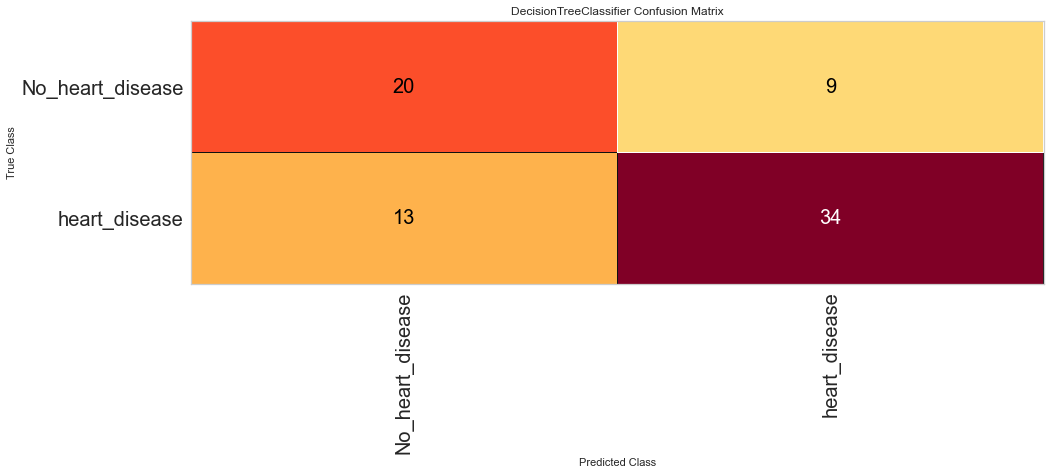

In [51]:
# Import Random Forest Regressor
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classification model
dt_model = DecisionTreeClassifier()

#The ConfusionMatrix visualizer taxes a model
classes = ['No_heart_disease','heart_disease']
cm = ConfusionMatrix(dt_model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
   label.set_size(20)

cm.poof()

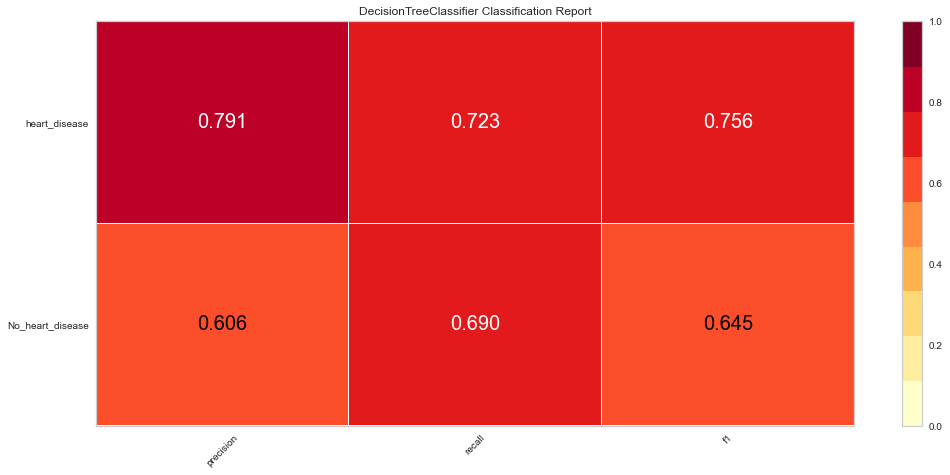

In [52]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(dt_model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [53]:
# Create prediction
y_pred = dt_model.predict(X_val)

# Use score method to get accuracy of model
score = dt_model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.7105263157894737
